In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
def move_idx(lat, lon, direction):
    if direction == 'R':
        return (lat, lon+1)
    elif direction == 'L':
        return (lat, lon-1)
    elif direction == 'U':
        return (lat+1, lon)
    elif direction == 'D':
        return (lat-1, lon)

def get_intersections(p1, p2, map_size, offset=1):
    
    wire_map1 = np.zeros((map_size, map_size))
    wire_map2 = np.zeros((map_size, map_size))
    for pp_idx in range(2):
        pp = [p1, p2][pp_idx]
        wire_map = [wire_map1, wire_map2][pp_idx]
        idx_lon = offset
        idx_lat = offset
        for inst in pp:
            for _ in range(int(inst[1:])):
                (idx_lat, idx_lon) = move_idx(idx_lat, idx_lon, inst[0])
                if idx_lat <0 or idx_lon <0:
                    raise ValueError
                wire_map[idx_lat, idx_lon] = wire_map[idx_lat, idx_lon] + 1
#         print(wire_map)
    return wire_map1, wire_map2

def get_closest(wire_map1, wire_map2, offset=1):
    map_size, _ = np.shape(wire_map1)
    closest = np.inf
    for ii in range(map_size):
        for jj in range(map_size):
            if wire_map1[ii,jj] and wire_map2[ii,jj]:
                print((ii,jj))
                dist = np.abs(ii-offset) + np.abs(jj-offset)
                if dist<closest:
                    closest = dist
    return closest
                
def get_intersections_timed(p1, p2, map_size, offset=1):
    
    wire_map1 = np.ones((map_size, map_size))*np.inf
    wire_map2 = np.ones((map_size, map_size))*np.inf
    for pp_idx in range(2):
        pp = [p1, p2][pp_idx]
        wire_map = [wire_map1, wire_map2][pp_idx]
        idx_lon = offset
        idx_lat = offset
        steps = 1
        for inst in pp:
            for _ in range(int(inst[1:])):
                (idx_lat, idx_lon) = move_idx(idx_lat, idx_lon, inst[0])
                if idx_lat <0 or idx_lon <0:
                    raise ValueError
                if steps < wire_map[idx_lat, idx_lon]:
                    wire_map[idx_lat, idx_lon] = steps
                steps = steps + 1
#         print(wire_map)
    return wire_map1, wire_map2

def get_closest_timed(wire_map1, wire_map2, offset=1):
    map_size, _ = np.shape(wire_map1)
    closest = np.inf
    for ii in range(map_size):
        if np.min(wire_map1[ii,:]) < np.inf and np.min(wire_map2[ii,:]) < np.inf:
            for jj in range(map_size):
                if wire_map1[ii,jj] + wire_map2[ii,jj] < closest:
                    print((ii,jj))
                    closest = wire_map1[ii,jj] + wire_map2[ii,jj]
    return closest
    

In [8]:
# Example
offset = 10
wm1, wm2 = get_intersections(['R8','U5','L5','D3'], ['U7','R6','D4','L4'], 
                             20, offset)
get_closest(wm1, wm2, offset)

(13, 13)
(15, 16)


6

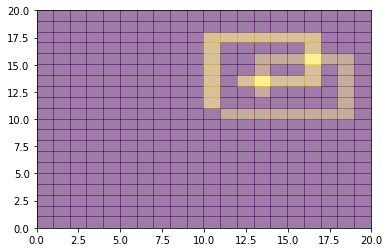

In [9]:
# Plot of example
plt.pcolormesh(wm1, alpha=0.3)
plt.pcolormesh(wm2, alpha=0.3)

In [10]:
# Another example
wm1, wm2 = get_intersections(['R75','D30','R83','U83','L12','D49','R71','U7','L72'], 
                       ['U62','R66','U55','R34','D71','R55','D58','R83'], 
                             1000, offset=100)
get_closest(wm1, wm2, offset=100)

(88, 258)
(104, 255)
(111, 255)
(146, 246)


159

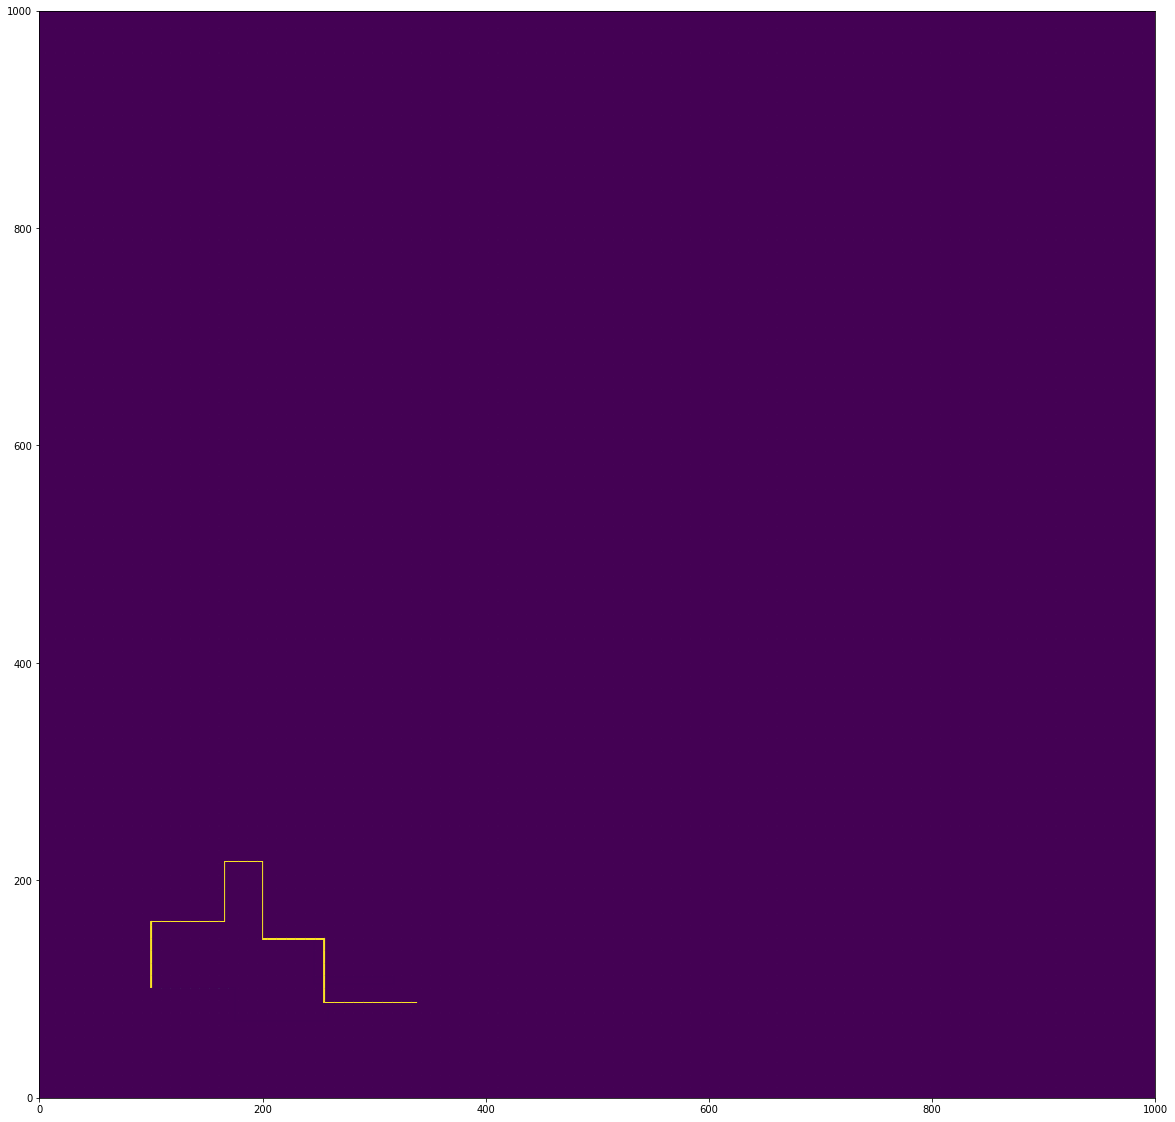

In [6]:
plt.figure(figsize=(20,20))
plt.pcolormesh(wm1, alpha=0.9)
plt.pcolormesh(wm2, alpha=0.9)

In [11]:
# A third example
offset = 100
wm1, wm2 = get_intersections(
    ['R98','U47','R26','D63','R33','U87','L62','D20','R33','U53','R51'], 
    ['U98','R91','D20','R16','D67','R40','U7','R15','U6','R7'], 
    1000, offset)
get_closest(wm1, wm2, offset)

(111, 224)
(118, 257)
(147, 207)
(151, 207)
(171, 207)


135

In [12]:
# Get inputs part one
inp_str1 ='R998,U547,L703,D251,L776,U837,R100,U240,R197,D216,L220,U606,L437,U56,R940,U800,L968,D464,L870,D797,L545,D824,R790,U5,R347,D794,R204,U538,L247,U385,L103,D260,L590,U813,L549,U309,L550,U321,R862,D686,R368,D991,R451,D836,R264,D138,L292,D319,L784,D369,R849,U865,R776,D726,R223,D118,L790,D208,L836,D592,R310,D36,R991,U674,L205,U407,R422,U350,L126,D320,L239,U353,L509,U48,R521,D544,L157,D551,R614,D493,R407,D965,R498,U248,R826,U573,L782,D589,R616,D992,L806,D745,R28,U142,L333,D849,L858,D617,R167,U341,R46,U940,L615,D997,L447,D604,R148,U561,R925,D673,R441,U200,R458,U193,L805,D723,L208,U600,L926,U614,R660,D183,L408,D834,R248,U354,L110,U391,L37,U599,L287,U28,R859,D936,L404,D952,R11,U20,R708,U218,L800,U750,R936,D213,R6,D844,R728,D391,R114,U406,R390,U791,L199,D397,R476,D583,R99,U419,R575,D836,L896,U780,L77,U964,R441,U723,R248,D170,R527,D94,L39,U645,L338,D728,R503,U641,L358,D287,R171,U368,R176,D986,R821,U912,L231,D206,L451,U900,L35,D490,R190,D180,L937,D500,R157,U989,L336,U202,R178,U52,R931,U306,L85,D866,R756,U715,L521,D977,R936,U4,R207,D384,L785,U138,L682,U488,L537,U250,L877,D446,R849,U35,R258,U784,R263,D494,L324,U601,R302,U473,L737,D143,R184,D967,R95,U51,L713,U733,R297,U740,R677,D715,R750,U143,L980,U260,R915,D535,R202,U460,R365,U956,L73,U441,R182,D982,L869,D755,L837,D933,L856,D341,R189,D519,L387,D144,R575,U682,R317,U838,R154,D201,R237,D410,L43,U853,L495,U983,L953,U220,R697,D592,R355,U377,R792,U824,L441,U783,R258,D955,R451,D178,L151,D435,L232,U923,L663,U283,L92,D229,R514'
inp1 = inp_str1.split(',')
inp_str2 ='L995,U122,R472,U470,R725,U906,L83,U672,R448,U781,L997,U107,R66,D966,L780,D181,L662,U158,R804,D837,L237,U164,L98,U582,R925,D806,L153,D843,R601,U941,L968,D528,R482,D586,R15,U370,L592,U836,R828,U676,R606,D20,R841,U117,L262,U377,R375,U503,R166,D398,R161,D9,R140,D188,R895,D226,R77,U28,L727,D72,L51,U425,R370,D377,L801,D525,R102,D568,L416,D300,R415,U199,R941,U211,R285,U719,L259,U872,L959,U350,L196,D830,R515,U899,R298,U875,R946,U797,R108,U461,R999,D49,L369,D472,R83,D265,L825,D163,R162,U906,L816,D241,L587,D801,R601,D630,R937,U954,L379,D347,R831,D337,L192,D649,L853,U270,R162,D892,L26,D663,L276,U891,R843,U67,R225,D88,R686,U662,R794,D814,L200,D887,R567,U363,L863,U16,R975,D470,R714,U771,L267,D402,R75,U98,L686,U565,R584,D402,L824,D927,R71,U39,L174,D494,L358,D626,R616,D369,R471,U881,L428,U53,R862,U749,L847,D944,L887,D695,R442,U870,L993,U315,L878,U100,L480,D354,L12,D533,L236,D364,R450,U679,L926,D391,R313,D953,L560,D740,L974,D119,L370,U404,R339,U233,R901,U514,R584,D495,R308,U170,R759,U592,R388,U396,R477,U670,R906,D687,L874,U352,R124,U700,R289,D524,L93,D817,R408,D776,L235,D928,L534,D296,R116,U995,L63,D903,R758,U881,L530,U498,R573,D626,L26,U269,R237,U287,L840,D603,R948,D567,R89,U552,L299,D774,R863,D182,R773,D108,L137,U88,L731,U793,L267,U902,L41,U258,L156,U361,R389,D839,L976,U960,L342,D489,R816,U391,L393,U601,R255,D629,R832,U877,L34,D373,L809,D679,L104,U901,R157,U468,R143,U896,L637,D577,L545,D486,L970,D130,L305,D909,R984,D500,L935,U949,R525,D547,L786,U106,L269,D511,L919'
inp2 = inp_str2.split(',')

In [13]:
# Part pne
offset = 10000
start = time.time()
wm1, wm2 = get_intersections(inp1, inp2, 20000, offset)
print(get_closest(wm1, wm2, offset))
end = time.time()
print(end-start)

(10000, 9057)
(10122, 9057)
(10296, 9550)
(10296, 9565)
(10329, 9519)
(10526, 9519)
(10592, 9519)
(10742, 9519)
(11270, 9596)
(11270, 9619)
(11270, 9816)
(11362, 9596)
(11362, 9619)
(11373, 9801)
(11763, 9588)
(11819, 9588)
(11819, 9801)
(11911, 8261)
(12038, 10099)
(12069, 8261)
(12619, 9636)
731
78.8904013633728


In [14]:
# Part two

In [15]:
# Example
offset = 10
wm1, wm2 = get_intersections_timed(['R8','U5','L5','D3'], ['U7','R6','D4','L4'], 
                             20, offset)

get_closest_timed(wm1, wm2, offset)

(13, 13)
(15, 16)


30.0

In [16]:
# Second example
wm1, wm2 = get_intersections_timed(['R75','D30','R83','U83','L12','D49','R71','U7','L72'], 
                       ['U62','R66','U55','R34','D71','R55','D58','R83'], 
                             1000, offset=100)
get_closest_timed(wm1, wm2, offset=100)

(88, 258)


610.0

In [17]:
# Third example
offset = 100
wm1, wm2 = get_intersections_timed(
    ['R98','U47','R26','D63','R33','U87','L62','D20','R33','U53','R51'], 
    ['U98','R91','D20','R16','D67','R40','U7','R15','U6','R7'], 
    1000, offset)
get_closest_timed(wm1, wm2, offset)

(111, 224)
(147, 207)


410.0

In [18]:
# Part two solution
offset = 10000
start = time.time()
wm1, wm2 = get_intersections_timed(inp1, inp2, 20000, offset)
print(get_closest_timed(wm1, wm2, offset))
end = time.time()
print(end-start)

(10000, 9057)
(10592, 9519)
5672.0
80.73424983024597
